<a href="https://colab.research.google.com/github/TechWhizGenius/Teja_INFO5731_Fall2024/blob/main/Mandaloju_Teja_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Path to csv file
file_path = '/content/drive/My Drive/INFO 5731 - Computational Methods/Week 7/imdb_reviews_cleaned.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)


Mounted at /content/drive


In [2]:
print(df.shape)
df.head()

(1000, 3)


,Review Title,Review Text,Rating
0,Murphy is exceptional,You'll have to have your wits about you and yo...,9
1,"A challenging watch to be sure, but a worthwhi...",NaN,8
2,Quality but exhausting,I'm a big fan of Nolan's work so was really lo...,7
3,And the Oscar goes to...,I'm still collecting my thoughts after experie...,10
4,A brilliantly layered examination of a man thr...,"""Oppenheimer"" is a biographical thriller film ...",10


In [3]:
# Assuming df is your DataFrame
df = df.sample(n=100, random_state=42)  # n=100 for 100 rows, random_state for reproducibility


In [4]:
df.shape

(100, 3)

In [5]:
import pandas as pd
import re
from collections import defaultdict


# Helper function to tokenize text
def tokenize(text):
    # Remove non-alphabetic characters and tokenize
    tokens = re.findall(r'\b\w+\b', text.lower())
    return tokens

# Count the frequency of all the N-grams (N=3) - Trigrams
def get_ngrams(text, n=3):
    tokens = tokenize(text)
    ngrams = [(tokens[i], tokens[i + 1], tokens[i + 2]) for i in range(len(tokens) - n + 1)]
    return ngrams

# Count trigrams across all reviews
trigram_counts = defaultdict(int)
for review in df['Review Text'].dropna():
    trigrams = get_ngrams(review)
    for trigram in trigrams:
        trigram_counts[trigram] += 1

# Display trigram counts
print("Trigram Counts:", trigram_counts)

# Calculate the probabilities for all the bigrams in the dataset
def get_bigrams(text):
    tokens = tokenize(text)
    bigrams = [(tokens[i], tokens[i + 1]) for i in range(len(tokens) - 1)]
    return bigrams

# Count bigrams and individual word occurrences
bigram_counts = defaultdict(int)
word_counts = defaultdict(int)

for review in df['Review Text'].dropna():
    bigrams = get_bigrams(review)
    tokens = tokenize(review)

    for bigram in bigrams:
        bigram_counts[bigram] += 1
    for token in tokens:
        word_counts[token] += 1

# Calculate bigram probabilities
bigram_probabilities = {}
for (w1, w2), count in bigram_counts.items():
    if word_counts[w1] > 0:
        bigram_probabilities[(w1, w2)] = count / word_counts[w1]

# Display bigram probabilities
print("Bigram Probabilities:", bigram_probabilities)

# Extract all noun phrases and calculate relative probabilities for each review
# Basic noun phrase extraction using regex (simplified approach)
def extract_noun_phrases(text):
    noun_phrases = re.findall(r'\b(?:\w+\s+){0,2}\w+\b', text.lower())  # Adjust pattern for better noun phrase extraction
    return noun_phrases

# Count noun phrase frequencies across the entire dataset
noun_phrase_counts = defaultdict(int)
for review in df['Review Text'].dropna():
    noun_phrases = extract_noun_phrases(review)
    for phrase in noun_phrases:
        noun_phrase_counts[phrase] += 1

# Find max frequency of each noun phrase
max_noun_phrase_freq = max(noun_phrase_counts.values())

# Calculate relative probabilities for each review in terms of noun phrases
relative_probabilities = []

for review in df['Review Text'].dropna():
    row = {}
    noun_phrases = extract_noun_phrases(review)
    for phrase in noun_phrases:
        row[phrase] = noun_phrase_counts[phrase] / max_noun_phrase_freq
    relative_probabilities.append(row)

# Convert relative probabilities to a DataFrame
relative_prob_df = pd.DataFrame(relative_probabilities).fillna(0)
relative_prob_df.index = df.index[:len(relative_prob_df)]  # Match with original index for alignment

# Display the relative probabilities table
print("Relative Probabilities Table:")
print(relative_prob_df)

# Save results to a CSV
relative_prob_df.to_csv('relative_probabilities.csv', index=True)


Trigram Counts: defaultdict(<class 'int'>, {('for', 'those', 'of'): 1, ('those', 'of', 'you'): 1, ('of', 'you', 'expecting'): 1, ('you', 'expecting', 'massive'): 1, ('expecting', 'massive', 'explosions'): 1, ('massive', 'explosions', 'and'): 1, ('explosions', 'and', 'thundering'): 1, ('and', 'thundering', 'sounds'): 1, ('thundering', 'sounds', 'of'): 1, ('sounds', 'of', 'the'): 1, ('of', 'the', 'bombs'): 1, ('the', 'bombs', 'dropped'): 1, ('bombs', 'dropped', 'on'): 1, ('dropped', 'on', 'the'): 1, ('on', 'the', 'two'): 1, ('the', 'two', 'cities'): 1, ('two', 'cities', 'will'): 1, ('cities', 'will', 'be'): 1, ('will', 'be', 'sorely'): 1, ('be', 'sorely', 'disappointed'): 1, ('sorely', 'disappointed', 'overall'): 1, ('disappointed', 'overall', 'a'): 1, ('overall', 'a', 'great'): 1, ('a', 'great', 'movie'): 2, ('great', 'movie', 'spending'): 1, ('movie', 'spending', 'great'): 1, ('spending', 'great', 'amount'): 1, ('great', 'amount', 'of'): 1, ('amount', 'of', 'time'): 1, ('of', 'time', '

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [27]:
# Write your code here

import pandas as pd
import re
import math
from collections import defaultdict


# Tokenization function
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Build the documents-terms weights (tf * idf) matrix

# Calculate term frequency (TF)
def calculate_tf(documents):
    tf_dict = []
    for doc in documents:
        tokens = tokenize(doc)
        word_count = len(tokens)
        tf = defaultdict(float)
        for word in tokens:
            tf[word] += 1 / word_count  # Term frequency as normalized count
        tf_dict.append(tf)
    return tf_dict

# Calculate inverse document frequency (IDF)
def calculate_idf(documents):
    idf = defaultdict(float)
    total_docs = len(documents)
    for doc in documents:
        tokens = set(tokenize(doc))
        for word in tokens:
            idf[word] += 1
    for word, count in idf.items():
        idf[word] = math.log(total_docs / (1 + count))  # Smoothing by adding 1
    return idf

# Calculate TF-IDF matrix
def calculate_tfidf(tf, idf):
    tfidf_matrix = []
    for doc_tf in tf:
        tfidf = {}
        for word, tf_value in doc_tf.items():
            tfidf[word] = tf_value * idf[word]
        tfidf_matrix.append(tfidf)
    return tfidf_matrix

# Apply TF-IDF calculations
documents = df['Review Text'].dropna().tolist()
tf = calculate_tf(documents)
idf = calculate_idf(documents)
tfidf_matrix = calculate_tfidf(tf, idf)

# Convert TF-IDF matrix to DataFrame for easy viewing
tfidf_df = pd.DataFrame(tfidf_matrix).fillna(0)
print("TF-IDF Matrix:")
print(tfidf_df)

# Cosine Similarity Calculation
def cosine_similarity(vec1, vec2):
    dot_product = sum(vec1.get(word, 0) * vec2.get(word, 0) for word in set(vec1) | set(vec2))
    magnitude1 = math.sqrt(sum([val ** 2 for val in vec1.values()]))
    magnitude2 = math.sqrt(sum([val ** 2 for val in vec2.values()]))
    if magnitude1 == 0 or magnitude2 == 0:
        return 0
    return dot_product / (magnitude1 * magnitude2)

# Define a custom query
query = "An outstanding movie with a haunting performance and best character development"
query_tokens = tokenize(query)

# Calculate query TF-IDF
query_tf = defaultdict(float)
for token in query_tokens:
    query_tf[token] += 1 / len(query_tokens)

query_tfidf = {word: query_tf[word] * idf.get(word, 0) for word in query_tf}

# Calculate similarity scores for each document
similarity_scores = []
for doc_index, doc_tfidf in enumerate(tfidf_matrix):
    score = cosine_similarity(query_tfidf, doc_tfidf)
    similarity_scores.append((doc_index, score))

# Sort documents by similarity score
ranked_documents = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

# Display ranked documents
print("Ranked Documents with Respect to Query:")
for rank, (doc_index, score) in enumerate(ranked_documents):
    print(f"Rank {rank + 1}: Document {doc_index + 1} (Similarity Score: {score:.4f})")
    print(f"Review Text: {documents[doc_index][:200]}...")  # Displaying first 200 chars for readability
    print()





TF-IDF Matrix:
         for     those        of       you  expecting   massive  explosions  \
0   0.005037  0.019229  0.002343  0.006301   0.016233  0.021753    0.017577   
1   0.005259  0.000000  0.001048  0.000000   0.000000  0.000000    0.000000   
2   0.000000  0.000000  0.000510  0.009596   0.024721  0.000000    0.000000   
3   0.003885  0.000000  0.000774  0.003644   0.000000  0.000000    0.000000   
4   0.004697  0.008966  0.001249  0.005876   0.000000  0.000000    0.000000   
..       ...       ...       ...       ...        ...       ...         ...   
69  0.000000  0.000000  0.002003  0.000000   0.000000  0.000000    0.000000   
70  0.002424  0.000000  0.002416  0.000000   0.000000  0.000000    0.000000   
71  0.004459  0.000000  0.001778  0.008368   0.000000  0.000000    0.000000   
72  0.002760  0.000000  0.002476  0.000000   0.000000  0.000000    0.000000   
73  0.000000  0.000000  0.002121  0.000000   0.000000  0.000000    0.000000   

         and  thundering    sounds  

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [29]:
import numpy as np
import pandas as pd
from collections import defaultdict
import re
import random

# Sample data from the assignment (ensure df is defined with your movie reviews)
documents = df['Review Text'].dropna().tolist()

# Preprocess the text
def preprocess_text(text):
    tokens = re.findall(r'\b\w+\b', text.lower())
    return tokens

# Build vocabulary
def build_vocab(documents):
    vocab = defaultdict(int)
    for doc in documents:
        tokens = preprocess_text(doc)
        for token in tokens:
            vocab[token] += 1
    return {word: idx for idx, word in enumerate(vocab.keys())}

# Convert documents to sequences of word indices
def convert_to_indices(documents, vocab):
    return [[vocab[word] for word in preprocess_text(doc) if word in vocab] for doc in documents]

# Generate training pairs (skip-gram model)
def generate_training_pairs(sequences, window_size=2):
    pairs = []
    for sequence in sequences:
        for i, target in enumerate(sequence):
            context_start = max(0, i - window_size)
            context_end = min(len(sequence), i + window_size + 1)
            context = [sequence[j] for j in range(context_start, context_end) if j != i]
            pairs.extend((target, context_word) for context_word in context)
    return pairs

# Initialize word embeddings and train the model
embedding_dim = 300
learning_rate = 0.01
vocab = build_vocab(documents)
vocab_size = len(vocab)

# Initialize embeddings
word_embeddings = np.random.randn(vocab_size, embedding_dim) * 0.01
context_embeddings = np.random.randn(vocab_size, embedding_dim) * 0.01

# Convert documents to sequences of indices
sequences = convert_to_indices(documents, vocab)
training_pairs = generate_training_pairs(sequences)

# Stable sigmoid function to prevent overflow
def stable_sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -10, 10)))  # Clamp x between -10 and 10

# Skip-gram model with negative sampling (numerically stable version)
def train_word2vec(training_pairs, word_embeddings, context_embeddings, epochs=10, k=5, learning_rate=0.01):
    for epoch in range(epochs):
        total_loss = 0
        for target, context in training_pairs:
            target_vec = word_embeddings[target]
            context_vec = context_embeddings[context]

            # Positive sample
            score = np.dot(target_vec, context_vec)
            p = stable_sigmoid(score)  # Use the stable sigmoid
            loss = -np.log(np.clip(p, 1e-10, 1))  # Clip to prevent log(0)
            total_loss += loss

            # Update embeddings
            grad_target = (p - 1) * context_vec
            grad_context = (p - 1) * target_vec
            word_embeddings[target] -= learning_rate * grad_target
            context_embeddings[context] -= learning_rate * grad_context

            # Negative sampling
            for _ in range(k):
                negative_context = random.randint(0, vocab_size - 1)
                neg_context_vec = context_embeddings[negative_context]
                score = np.dot(target_vec, neg_context_vec)
                p = stable_sigmoid(-score)  # Use the stable sigmoid with negative sign
                loss = -np.log(np.clip(1 - p, 1e-10, 1))  # Clip to prevent log(0)
                total_loss += loss

                # Update embeddings
                grad_target = p * neg_context_vec
                grad_neg_context = p * target_vec
                word_embeddings[target] -= learning_rate * grad_target
                context_embeddings[negative_context] -= learning_rate * grad_neg_context

        print(f'Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}')

# Run the training
train_word2vec(training_pairs, word_embeddings, context_embeddings)


Epoch 1/10, Loss: 271025.4721
Epoch 2/10, Loss: 1010270.5908
Epoch 3/10, Loss: 3016458.4859
Epoch 4/10, Loss: 2913319.6179
Epoch 5/10, Loss: 2948553.8226
Epoch 6/10, Loss: 2928827.7317
Epoch 7/10, Loss: 2909347.7317
Epoch 8/10, Loss: 2940257.7317
Epoch 9/10, Loss: 2925377.7317
Epoch 10/10, Loss: 2911747.7317


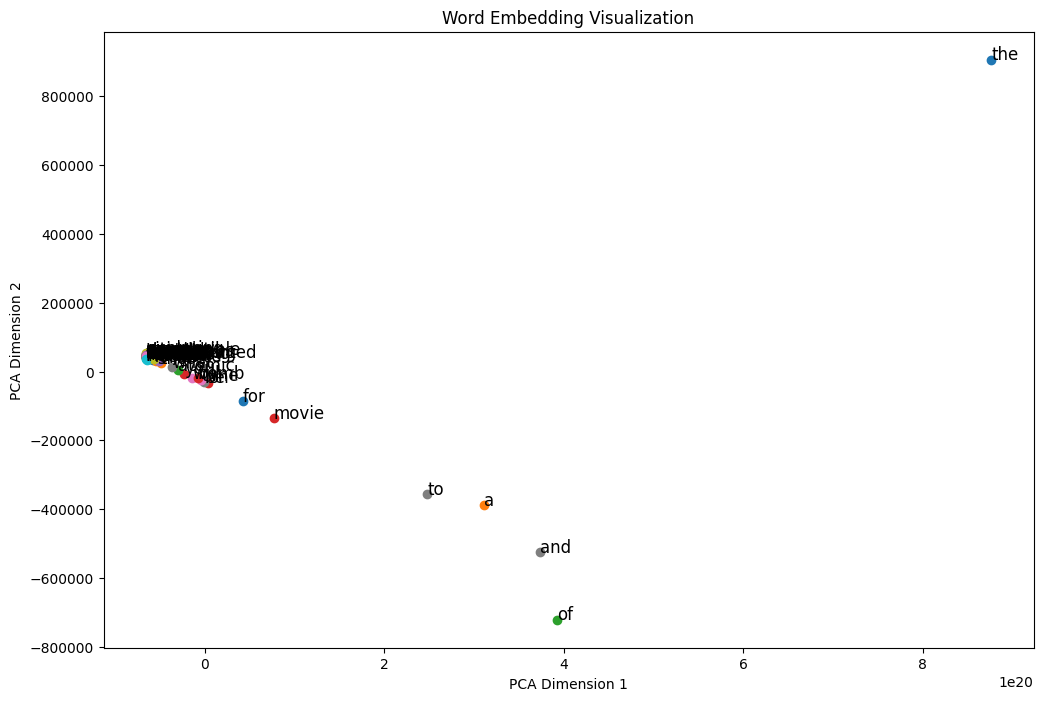

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA for dimensionality reduction
def visualize_embeddings(word_embeddings, vocab, num_words=50):
    words = list(vocab.keys())[:num_words]
    idxs = [vocab[word] for word in words]
    embeddings = word_embeddings[idxs]

    # Apply PCA to reduce to 2D
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)

    # Plot the embeddings
    plt.figure(figsize=(12, 8))
    for i, word in enumerate(words):
        x, y = reduced_embeddings[i]
        plt.scatter(x, y)
        plt.text(x + 0.01, y + 0.01, word, fontsize=12)
    plt.title('Word Embedding Visualization')
    plt.xlabel('PCA Dimension 1')
    plt.ylabel('PCA Dimension 2')
    plt.show()

# Visualize the top 50 words
visualize_embeddings(word_embeddings, vocab)


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [43]:
# The GitHub link of your final csv file


# Link: https://github.com/TechWhizGenius/Teja_INFO5731_Fall2024/blob/main/annotated_movie_reviews.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [1]:
# Type your answer

'''
Overall, I found the assignment to be a valuable learning experience that challenged me to apply theoretical concepts in a practical setting, particularly in areas
like sentiment analysis and natural language processing. One of the most challenging aspects was implementing the N-gram analysis from scratch, as I struggled with
calculating probabilities correctly and managing the complexity of the code. However, I really enjoyed building the word embedding model, and seeing the
visualization of the word embeddings made the concepts more tangible and rewarding. In terms of time management, I felt that while the time allocated was
adequate, an extension would have been beneficial, especially for the sentiment analysis and evaluation sections, as they required more time than I initially
anticipated.
'''


'\nOverall, I found the assignment to be a valuable learning experience that challenged me to apply theoretical concepts in a practical setting, particularly in areas\nlike sentiment analysis and natural language processing. One of the most challenging aspects was implementing the N-gram analysis from scratch, as I struggled with\ncalculating probabilities correctly and managing the complexity of the code. However, I really enjoyed building the word embedding model, and seeing the \nvisualization of the word embeddings made the concepts more tangible and rewarding. In terms of time management, I felt that while the time allocated was \nadequate, an extension would have been beneficial, especially for the sentiment analysis and evaluation sections, as they required more time than I initially\nanticipated.\n'